<h2 style="color:green" align="center"> TELECOM CUSTOMER CHURN PREDICTION using LOGISTIC REGRESSION </h2>

<b>Problem Statement</b>

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

The Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription, will be used to develop predictive models.


<b> Information about dataset </b>

Telecom Churn Datasets

Each row represents a customer; each column contains customer’s attributes.
The datasets have the following attributes or features:

`State`: string

`Account length`: integer

`Area code`: integer

`International plan`: string

`Voice mail plan`: string

`Number vmail messages`: integer

`Total day minutes`: double

`Total day calls`: integer

`Total day charge`: double

`Total eve minutes`: double

`Total eve calls`: integer

`Total eve charge`: double

`Total night minutes`: double

`Total night calls`: integer

`Total night charge`: double

`Total intl minutes`: double

`Total intl calls`: integer

`Total intl charge`: double

`Customer service calls`: integer

`Churn`: string
    
The dataset contains 2666 rows (customers) and 20 columns (features).

The "Churn" column is the target to predict.

<h2 style="color:blue" align="left"> 1. Import necessary Libraries </h2>

In [1]:
# Read Data
import numpy as np                     # For doing Numerical caluculation like mean, std, mode etc.,
import pandas as pd                    # for loading, reading and manipulation the data

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn


import warnings                        # Ignore Warnings
warnings.filterwarnings("ignore")

<h2 style="color:blue" align="left"> 2. Loading dataset </h2>

In [2]:
df = pd.read_csv('churn_data.csv')
print(f'First 5 rows \n\n{df.head()}')

First 5 rows 

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1      

In [3]:
# checking dimension (num of rows and columns) of dataset
print("data shape (Rows, Columns):",df.shape)

data shape (Rows, Columns): (2666, 20)


In [4]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

<h2 style="color:blue" align="left"> 3. EDA (Exploratory Data Analysis) </h2>

- EDA is a way of **Visualizing, Summarizing and interpreting** the information that is **hidden in rows and column** format.

- Find Unwanted Columns
- Find Missing Values
- Find Features with one value
- Explore the Categorical Features
- Find Categorical Feature Distribution
- Relationship between Categorical Features and Label
- Explore the Numerical Features
- Find Discrete Numerical Features
- Relation between Discrete numerical Features and Labels
- Find Continous Numerical Features
- Distribution of Continous Numerical Features
- Relation between Continous numerical Features and Labels
- Find Outliers in numerical features
- Explore the Correlation between numerical features


<b> 1. Find Unwanted Columns </b>

Currenlty no any umwanted columns in the dataset

<b> 2. Find Missing Values </b>

In [5]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

This dataset does not contain any missing values 

<b> 3. Explore categorical Features </b>

In [6]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
categorical_features

['State', 'International plan', 'Voice mail plan']

<b>4. Find Categorical Feature Distribution </b>

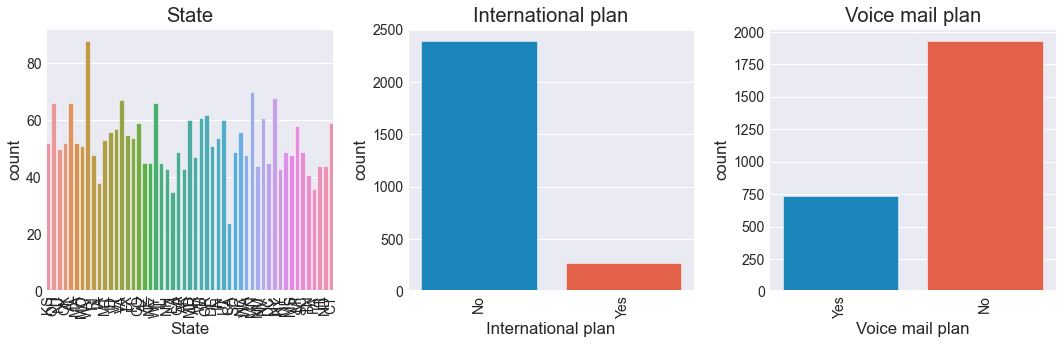

In [7]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

<b> 5. Relationship between Categorical Features and Label </b>

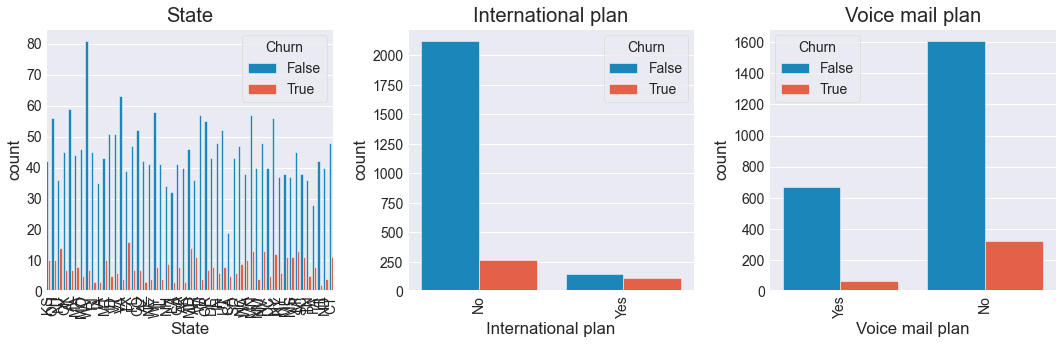

In [8]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Seaborn with 'Attrition' as hue
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Churn', data=df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()


# Show plot
plt.show()

<b> 6. Explore Numerical Features </b>

In [9]:
numerical_features = df.select_dtypes(exclude='object')
numerical_features.drop(['Churn'], inplace=True, axis=1)
numerical_features

Account length  Area code  Number vmail messages  Total day minutes  \
0                128        415                     25              265.1   
1                107        415                     26              161.6   
2                137        415                      0              243.4   
3                 84        408                      0              299.4   
4                 75        415                      0              166.7   
...              ...        ...                    ...                ...   
2661              79        415                      0              134.7   
2662             192        415                     36              156.2   
2663              68        415                      0              231.1   
2664              28        510                      0              180.8   
2665              74        415                     25              234.4   

      Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0                 110             45.07              197.4               99   
1                 123             27.47              195.5              103   
2                 114             41.38              121.2              110   
3                  71             50.90               61.9               88   
4                 113             28.34              148.3              122   
...               ...               ...                ...              ...   
2661               98             22.90              189.7               68   
2662               77             26.55              215.5              126   
2663               57             39.29              153.4               55   
2664              109             30.74              288.8               58   
2665              113             39.85              265.9               82   

      Total eve charge  Total night minutes  Total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
2661             16.12                221.4                128   
2662             18.32                279.1                 83   
2663             13.04                191.3                123   
2664             24.55                191.9                 91   
2665             22.60                241.4                 77   

      Total night charge  Total intl minutes  Total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
2661                9.96                11.8                 5   
2662               12.56                 9.9                 6   
2663                8.61                 9.6                 4   
2664                8.64                14.1                 6   
2665               10.86                13.7                 4   

      Total intl charge  Customer service calls  
0                  2.70                       1  
1                  3.70                       1  
2                  3.29                       0  
3                  1.78                       2  
4                  2.73                       3  
...                 ...                     ...  
2661               3.19                       2  
2662               2.67                       2  
2663               2.59                       3  
2664               3.81                       

<b>7. Find Discrete Numerical Features</b>

In [10]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


In [11]:
discrete_feature

['Area code', 'Total intl calls', 'Customer service calls']

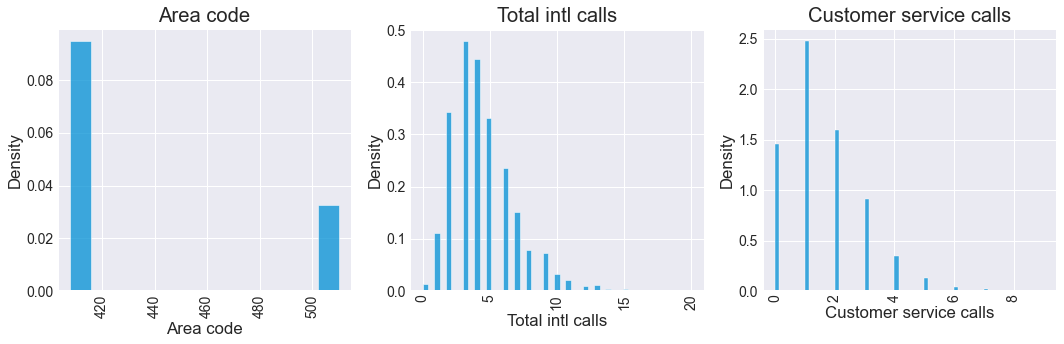

In [12]:
#cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create the stacked density plot
num_cols = len(discrete_feature)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, var in enumerate(discrete_feature):
    sns.histplot(data=df, x=var, stat='density', multiple='stack', ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

<b> 8. Relation between Discrete numerical Features and Labels </b>

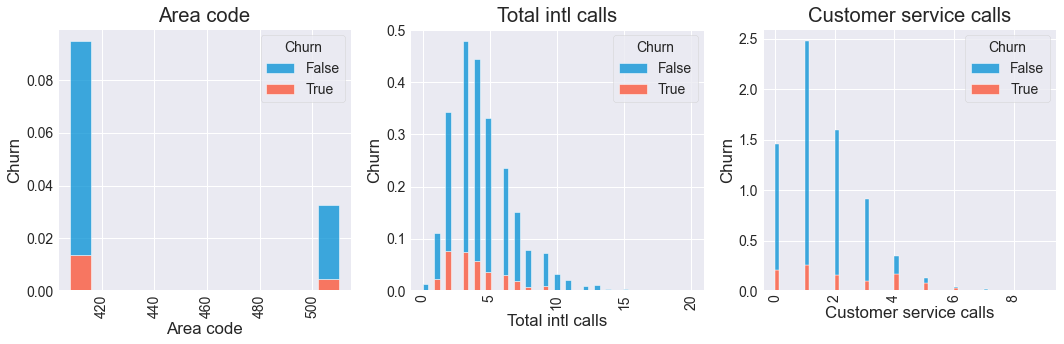

In [13]:
# Get the names of all columns with data type 'object' (categorical columns)
# cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create the stacked density plot
num_cols = len(discrete_feature)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, var in enumerate(discrete_feature):
    sns.histplot(data=df, x=var, hue='Churn', stat='density', multiple='stack', ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_ylabel('Churn')
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

<b>9. Find Continous Numerical Features</b>

In [14]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 13


In [15]:
continuous_features

['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl charge']

<b>10. Distribution of Continous Numerical Features</b>

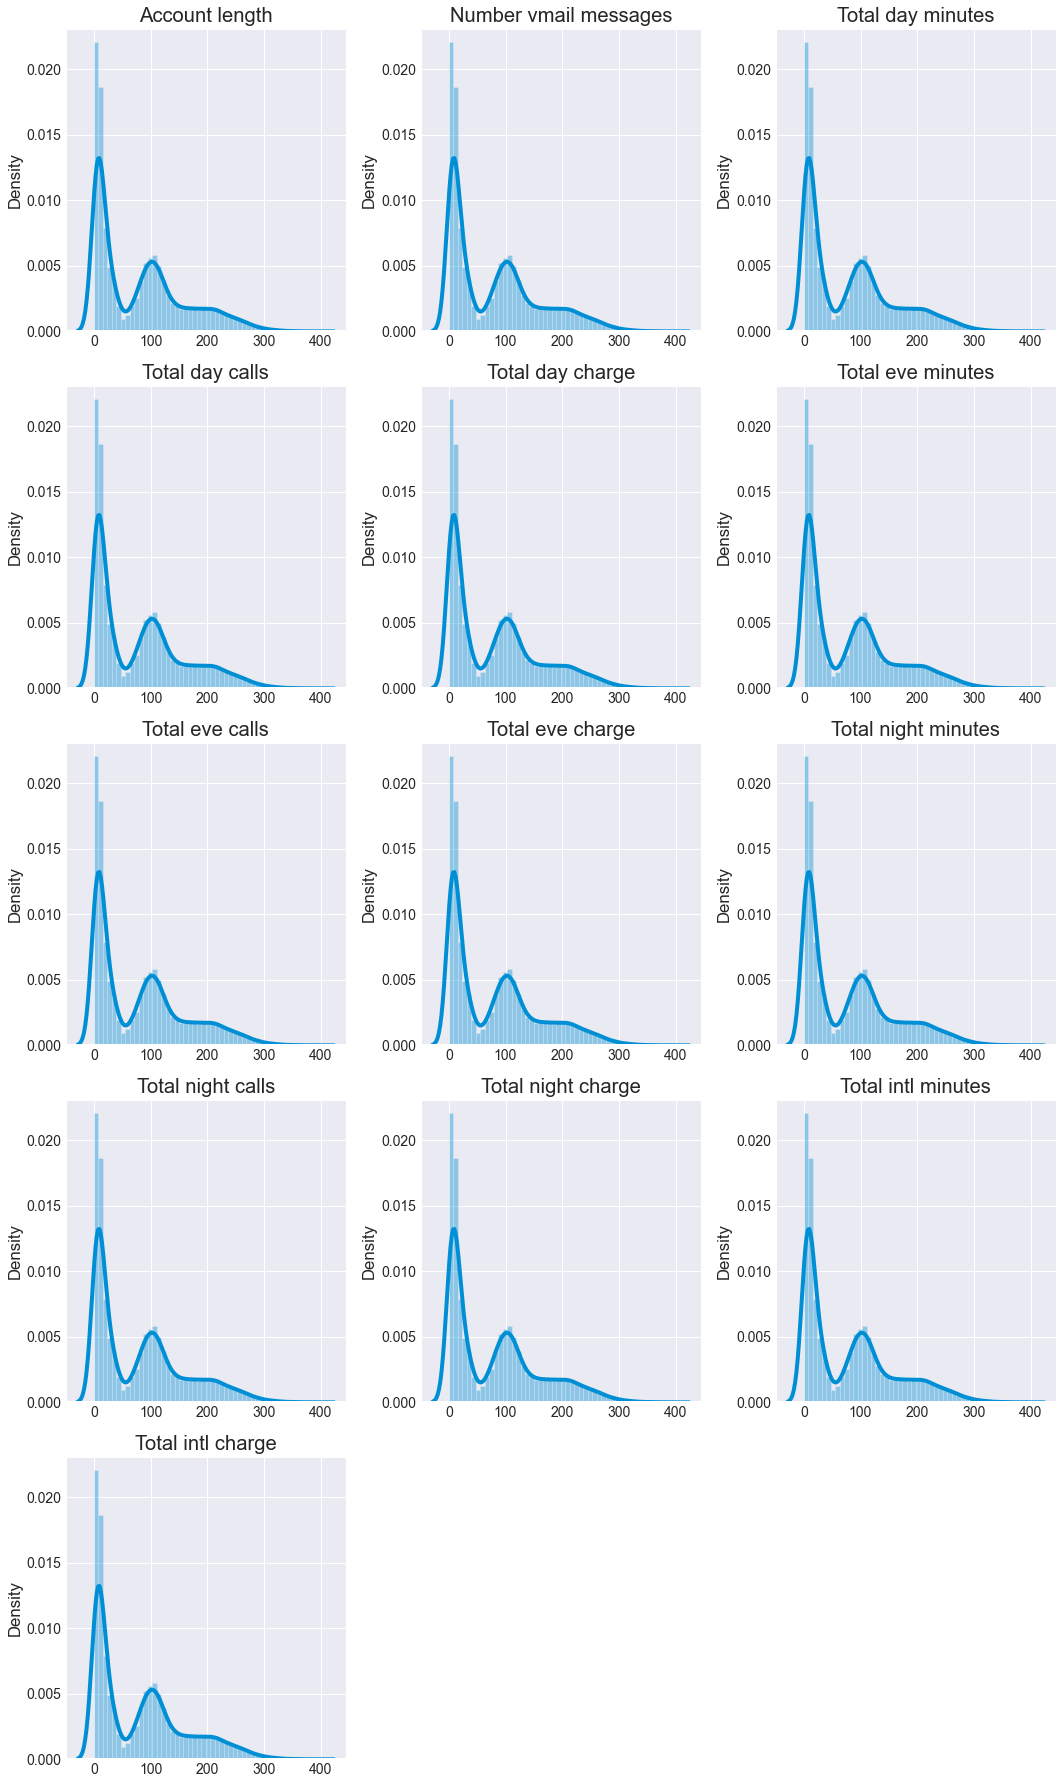

In [16]:
# Get the names of all columns with data type 'int'
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature]

# Create a figure with subplots
num_cols = len(continuous_features)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(continuous_features):
    #sns.distplot(df, x=var, kde=True, ax=axs[i])
    sns.distplot(df[continuous_features], kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

<b> 11. Relation between Continous numerical Features and Labels </b>

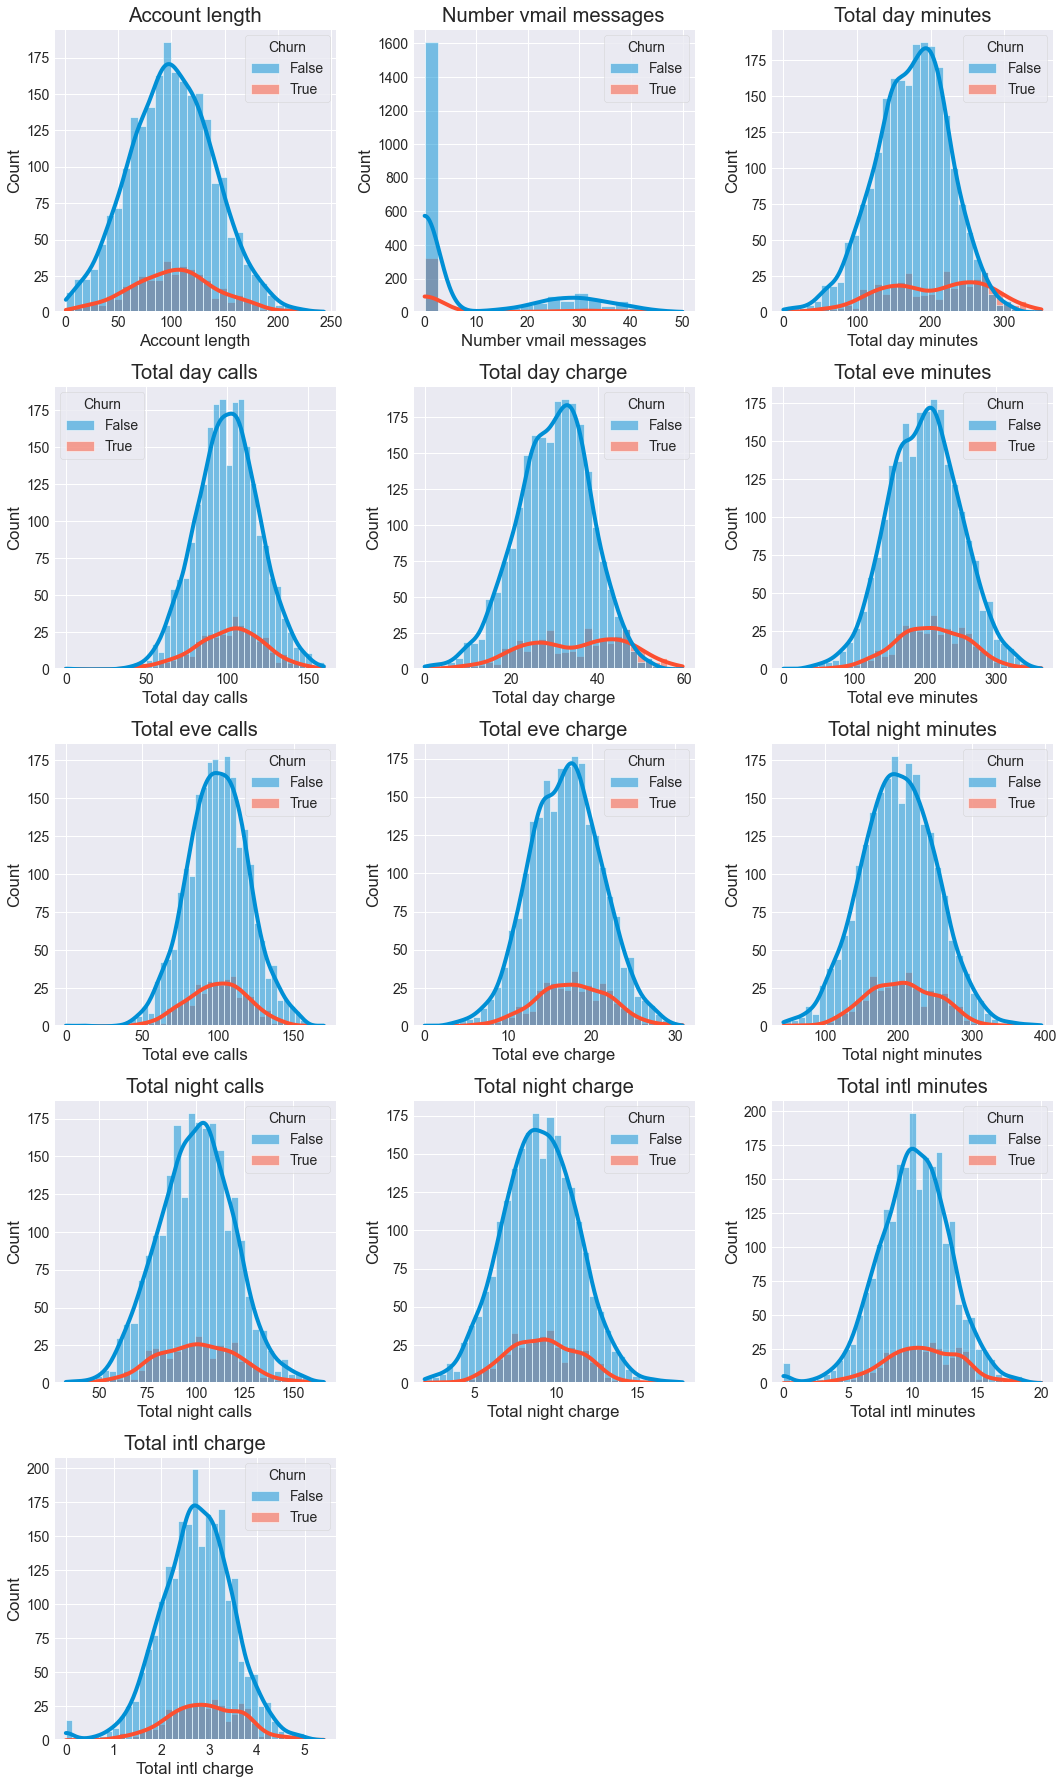

In [17]:
# Get the names of all columns with data type 'int'
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature]

# Create a figure with subplots
num_cols = len(continuous_features)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(continuous_features):
    sns.histplot(data=df, x=var, hue='Churn', kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

<b> 12. Find Outliers in numerical features </b>

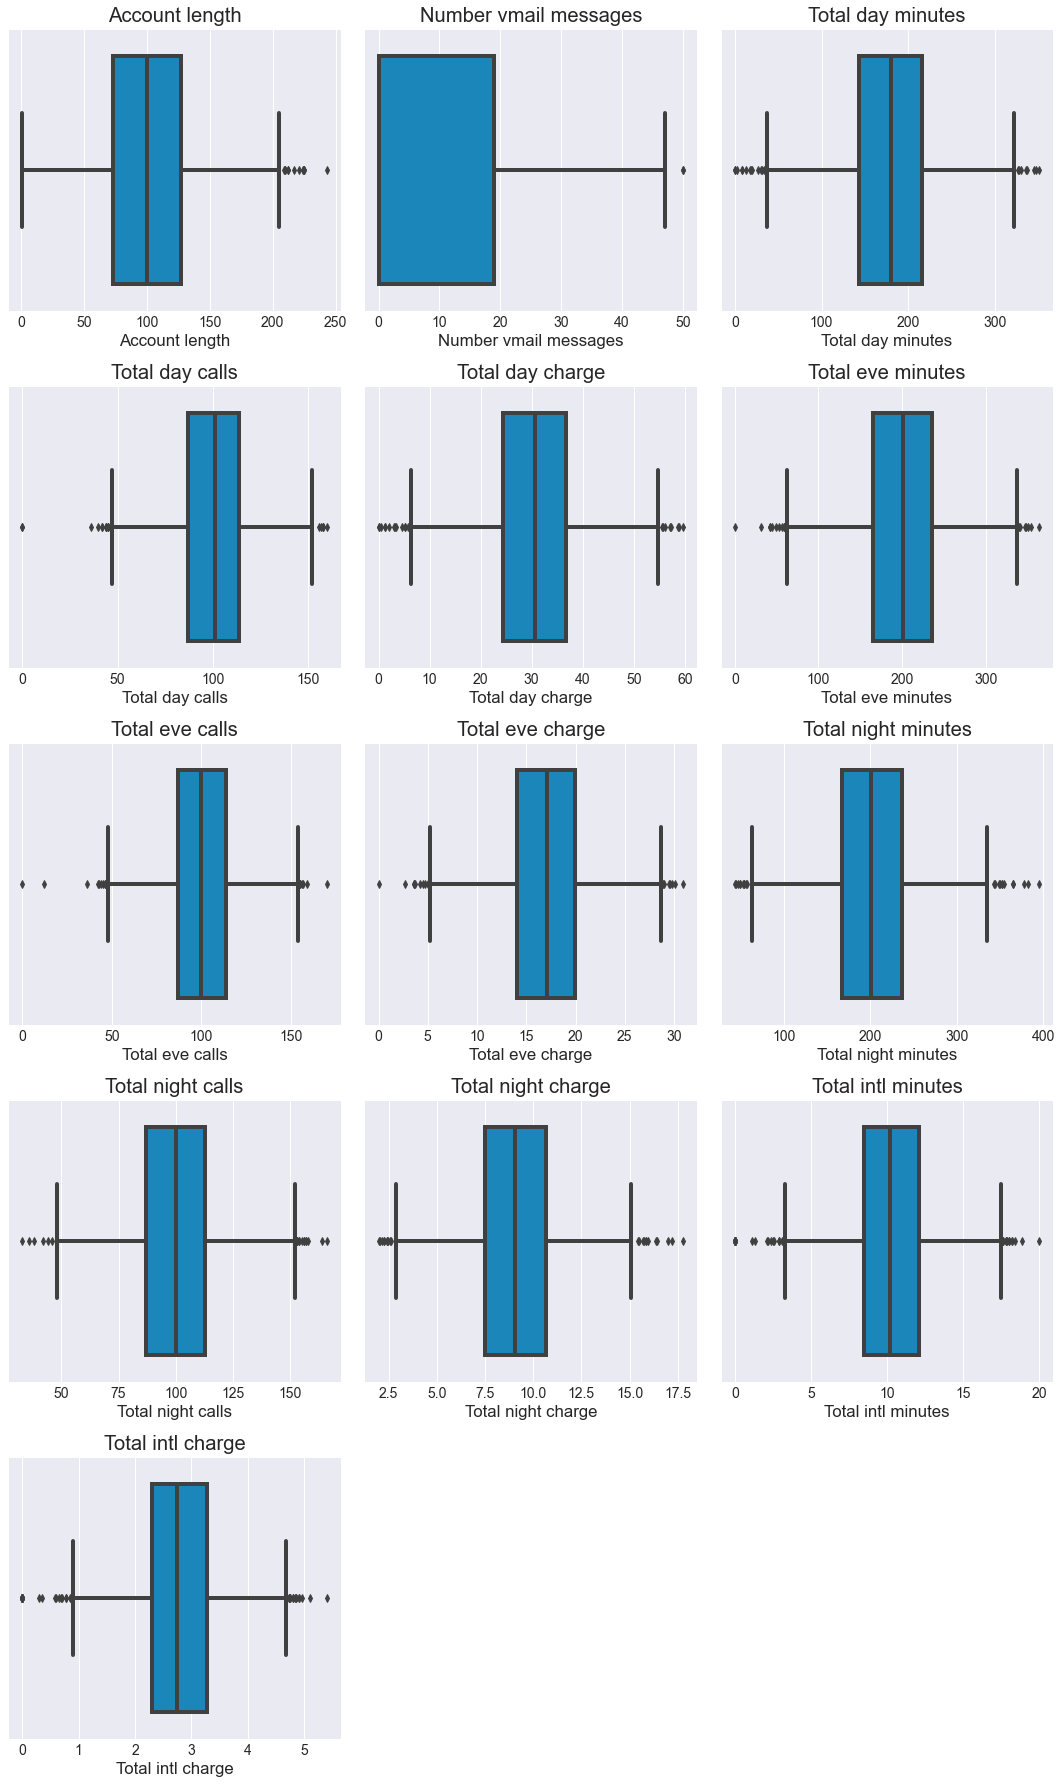

In [18]:
# Get the names of all columns with data type 'int'
num_vars = [feature for feature in numerical_features if feature not in discrete_feature]

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

<b> 13. Explore the Correlation between numerical features </b>

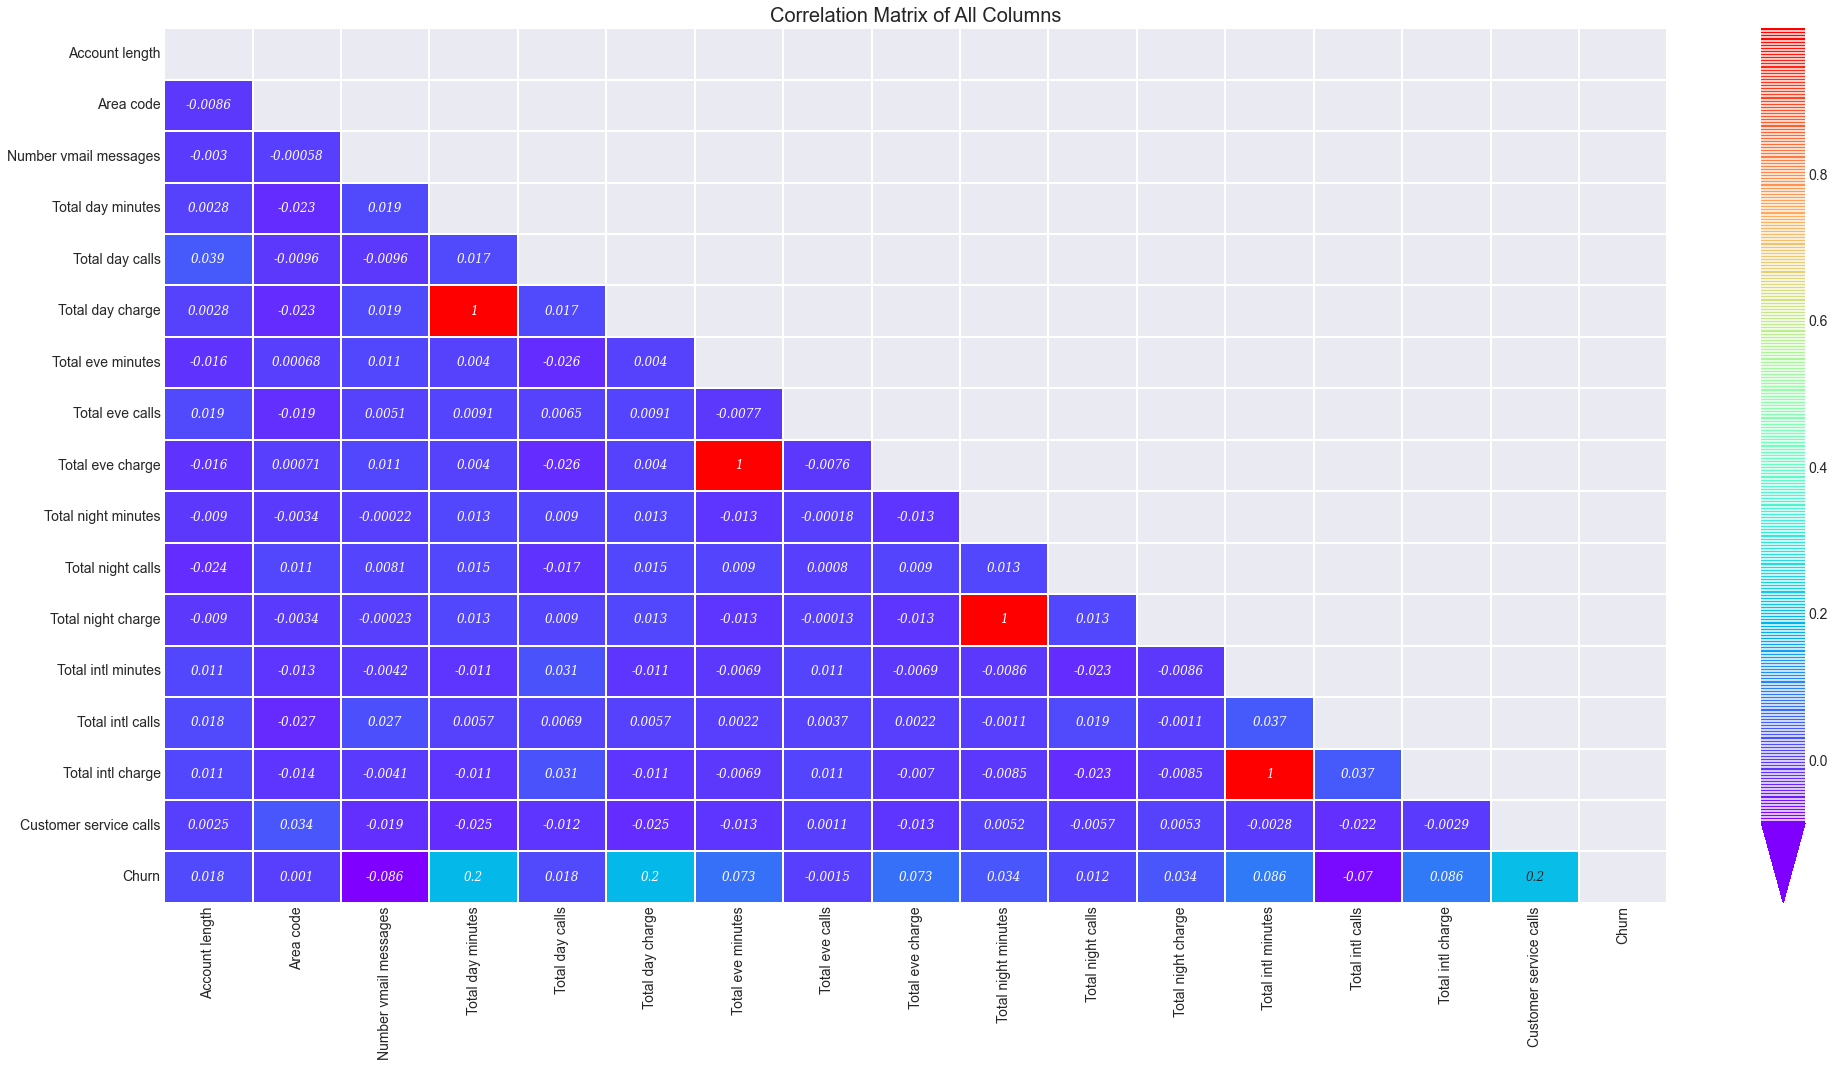

In [19]:
# Define the figure size
plt.figure(figsize = (30,15))

# Cutomize the annot
annot_kws={'fontsize':12,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix of All Columns', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

<h2 style="color:blue" align="left"> 4. Descriptive Statistics  </h2>

In [20]:
df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.215733          50.951515        20.161445   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.380000         165.300000        87.000000   
50%         101.000000         30.590000         200.900000       100.000000   
75%         114.000000         36.700000         235.100000       114.000000   
max         160.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       2666.000000          2666.000000        2666.000000   
mean          17.033072           201.168942         100.106152   
std            4.330864            50.780323          19.418459   
min            0.000000            43.700000          33.000000   
25%           14.050000           166.925000          87.000000   
50%           17.080000           201.150000         100.000000   
75%           19.980000           236.475000         113.000000   
max           30.910000           395.000000         166.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         2666.000000         2666.000000       2666.000000   
mean             9.052689           10.237022          4.467367   
std              2.285120            2.788349          2.456195   
min              1.970000            0.000000          0.000000   
25%              7.512500            8.500000          3.000000   
50%              9.050000           10.200000          4.000000   
75%             10.640000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        2666.000000             2666.000000  
mean            2.764490                1.562641  
std             0.752812                1.311236  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.750000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

<h2 style="color:blue" align="left"> 5. Data Visualization </h2>

### 1. Categorical

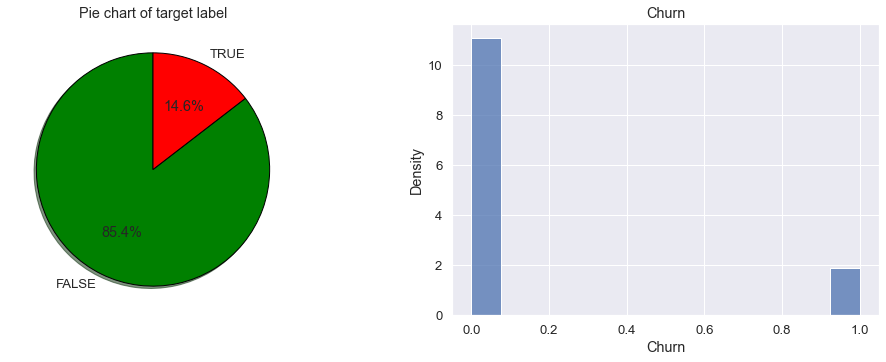

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
F = df[df['Churn'] == False].shape[0] 
T = df[df['Churn'] == True].shape[0]
class_ = [F,T]
labels = ['FALSE', 'TRUE']
plt.pie(class_,labels=labels, shadow=True, startangle=90,colors=['green', 'red'],
        wedgeprops={'edgecolor':'black'},
        autopct='%4.1f%%')
plt.title('Pie chart of target label')


plt.subplot(1,2,2)
sns.histplot(data = df, x='Churn',stat='density', multiple='stack') 
plt.title('Churn')

plt.show()

<b> Inference: </b>
- `Churn` dataset has 14.6% data has Churn as True and 85.4% not Churning

### 2. Univariate Analysis

- Univariate Analysis : data consists of **only one variable (only x value)**.

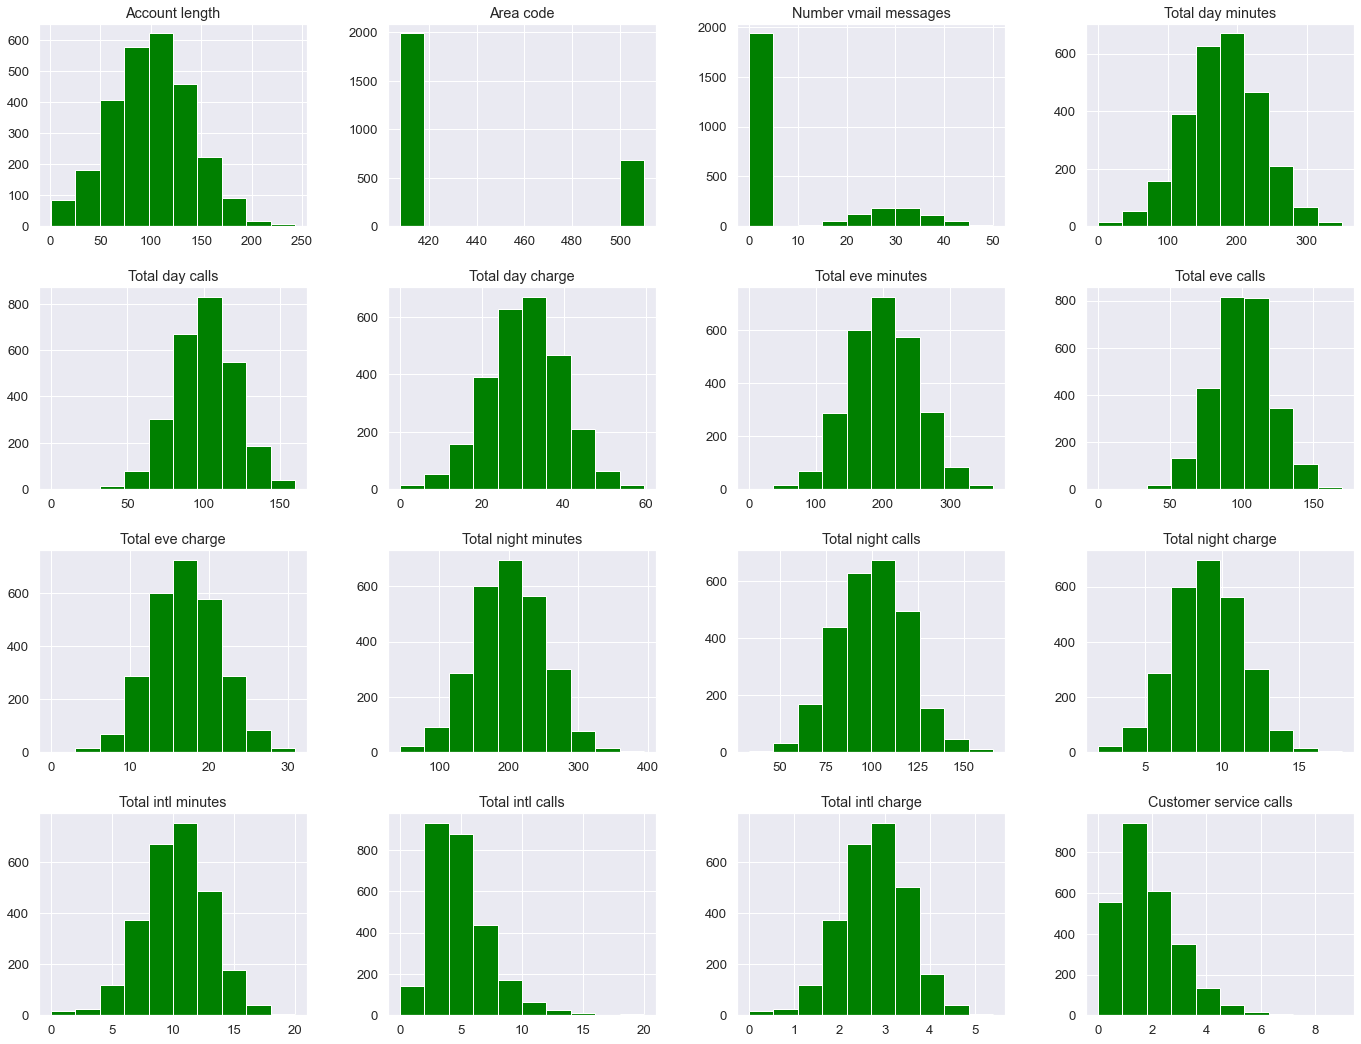

In [22]:
#Histogram of numerical Variables
df.hist(figsize=(21,17), color=['green'])
plt.show()

<b> Inference: </b>
- Almost all the features are symmetrical and fairly skewed

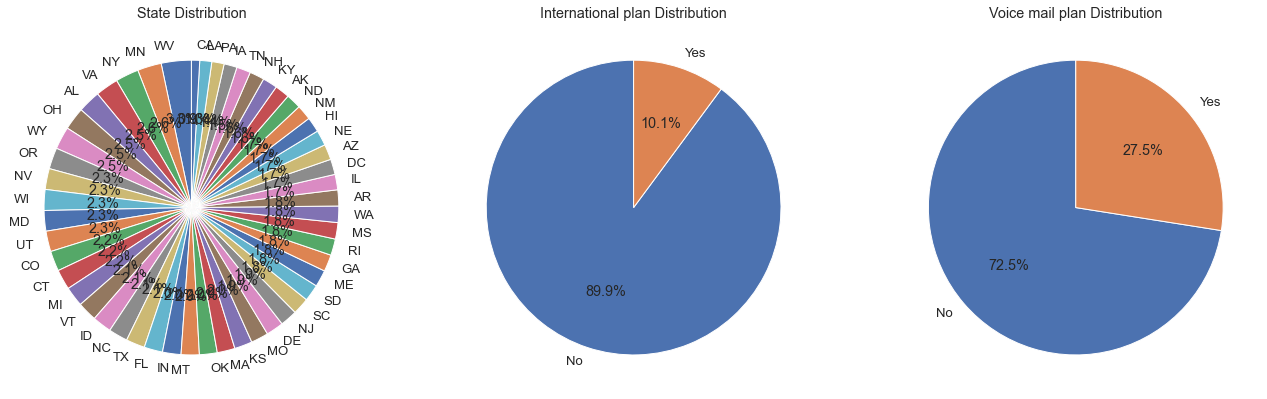

In [23]:
# Create a figure with subplots

fig, axs = plt.subplots(nrows= 1, ncols=3, figsize=(20,24))

# Create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        
        # Count the number of occurrences for each category
        cat_counts = df[var].value_counts()
        
        # Create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        
        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')


# show plot
plt.show()

### 3. Bivariate Analysis

- **Bivariate Analysis** : data involves **two different variables**.

In [24]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

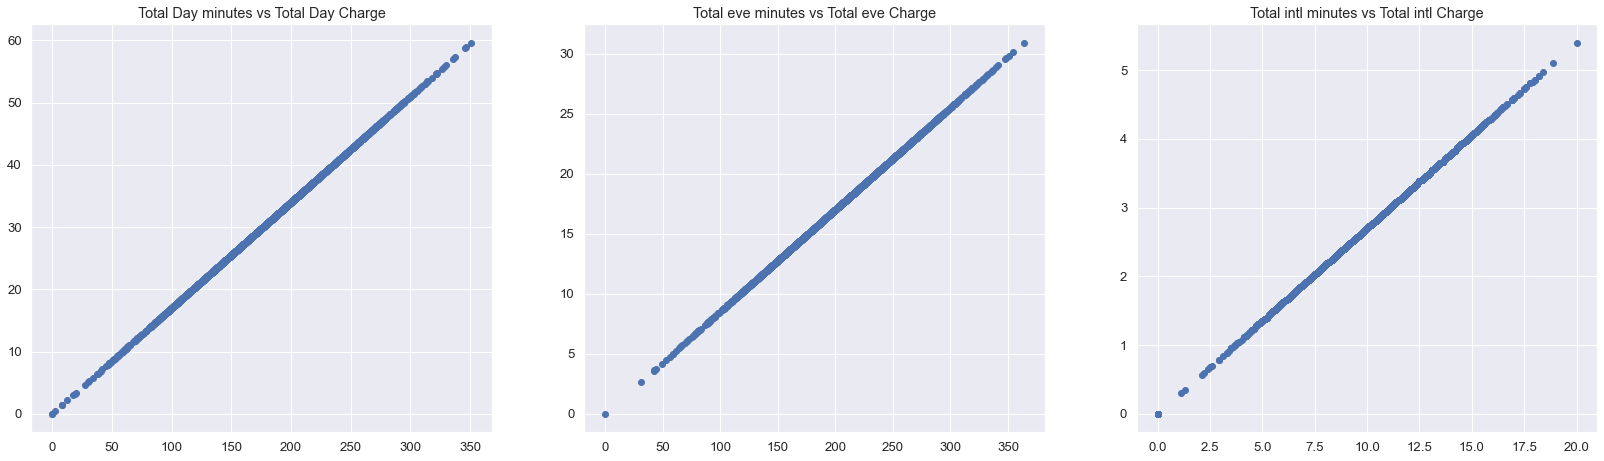

In [25]:
plt.figure(figsize=(25,7))

plt.subplot(1,3,1)
plt.scatter(df['Total day minutes'], df['Total day charge'])
plt.title('Total Day minutes vs Total Day Charge')

plt.subplot(1,3,2)
plt.scatter(df['Total eve minutes'], df['Total eve charge'])
plt.title('Total eve minutes vs Total eve Charge')

plt.subplot(1,3,3)
plt.scatter(df['Total intl minutes'], df['Total intl charge'])
plt.title('Total intl minutes vs Total intl Charge')

plt.show()

<b> Inference: </b>
- `Total day minutes` and `Total day charge` are linearly dependent
- `Total eve minutes` and `Total eve charge` are linearly dependent
- `Total intl minutes` and `Total intl charge` are linearly dependent

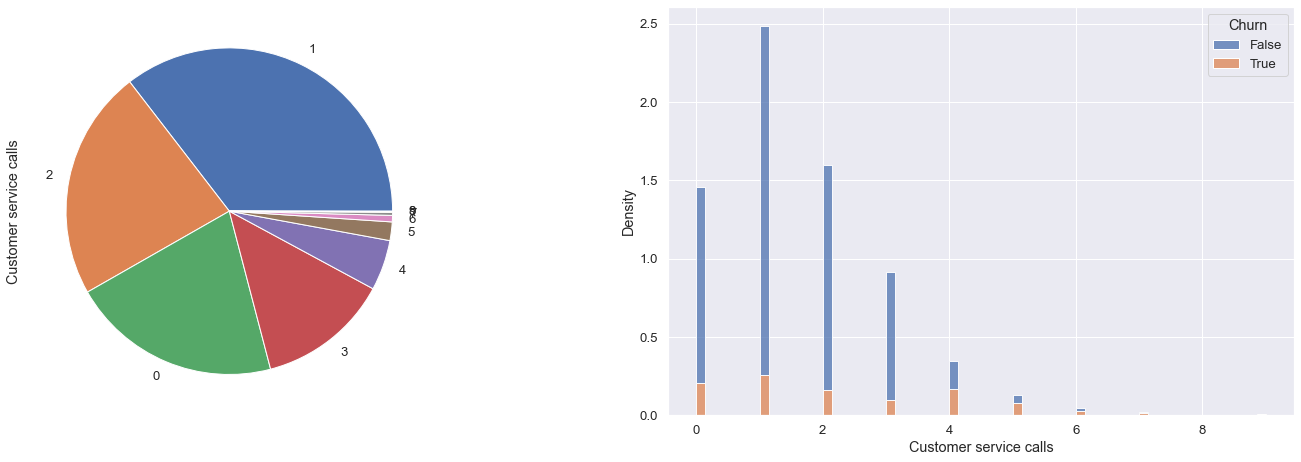

In [26]:
plt.figure(figsize=(22,7))

plt.subplot(1,2,1)
df['Customer service calls'].value_counts().plot(kind='pie')


plt.subplot(1,2,2)
sns.histplot(data = df, x= 'Customer service calls', hue= 'Churn',stat='density', multiple='stack') 

plt.show()

<b> Inference: </b>
- From the graphs, significantly there is no any relation between Customer service calls vs Churn

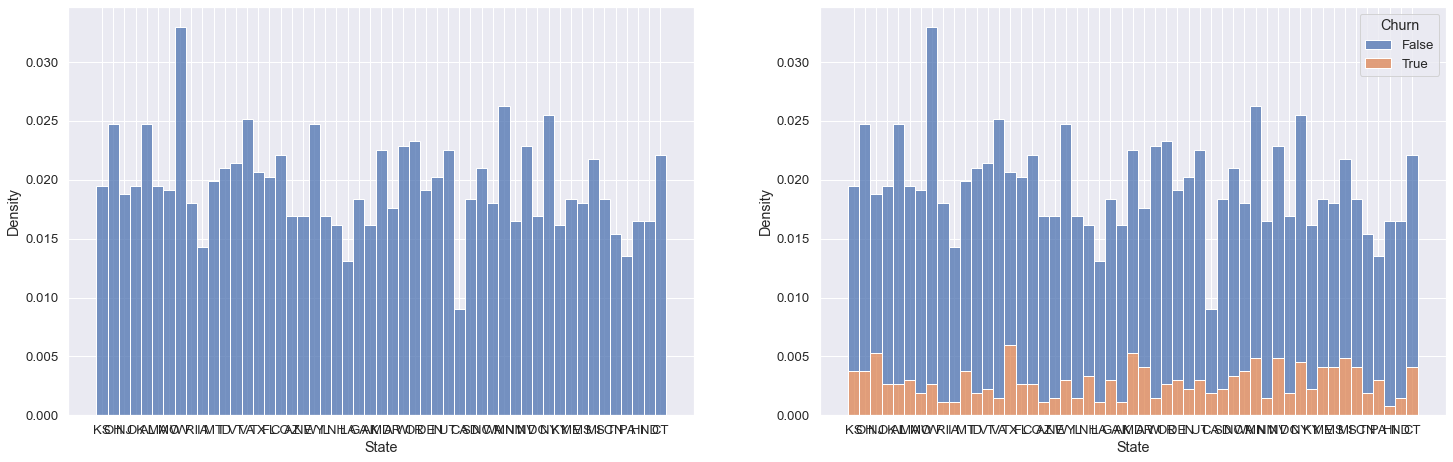

In [27]:
plt.figure(figsize=(22,7))

plt.subplot(1,2,1)
sns.histplot(data = df, x= 'State',stat='density', multiple='stack') 

plt.subplot(1,2,2)
sns.histplot(data = df, x= 'State', hue= 'Churn',stat='density', multiple='stack') 

plt.show()

State is not much significat in defining the churn prediction

### 3. Multivariate Analysis

- **Multivariate Analysis** : data involves **multiple different variables**.


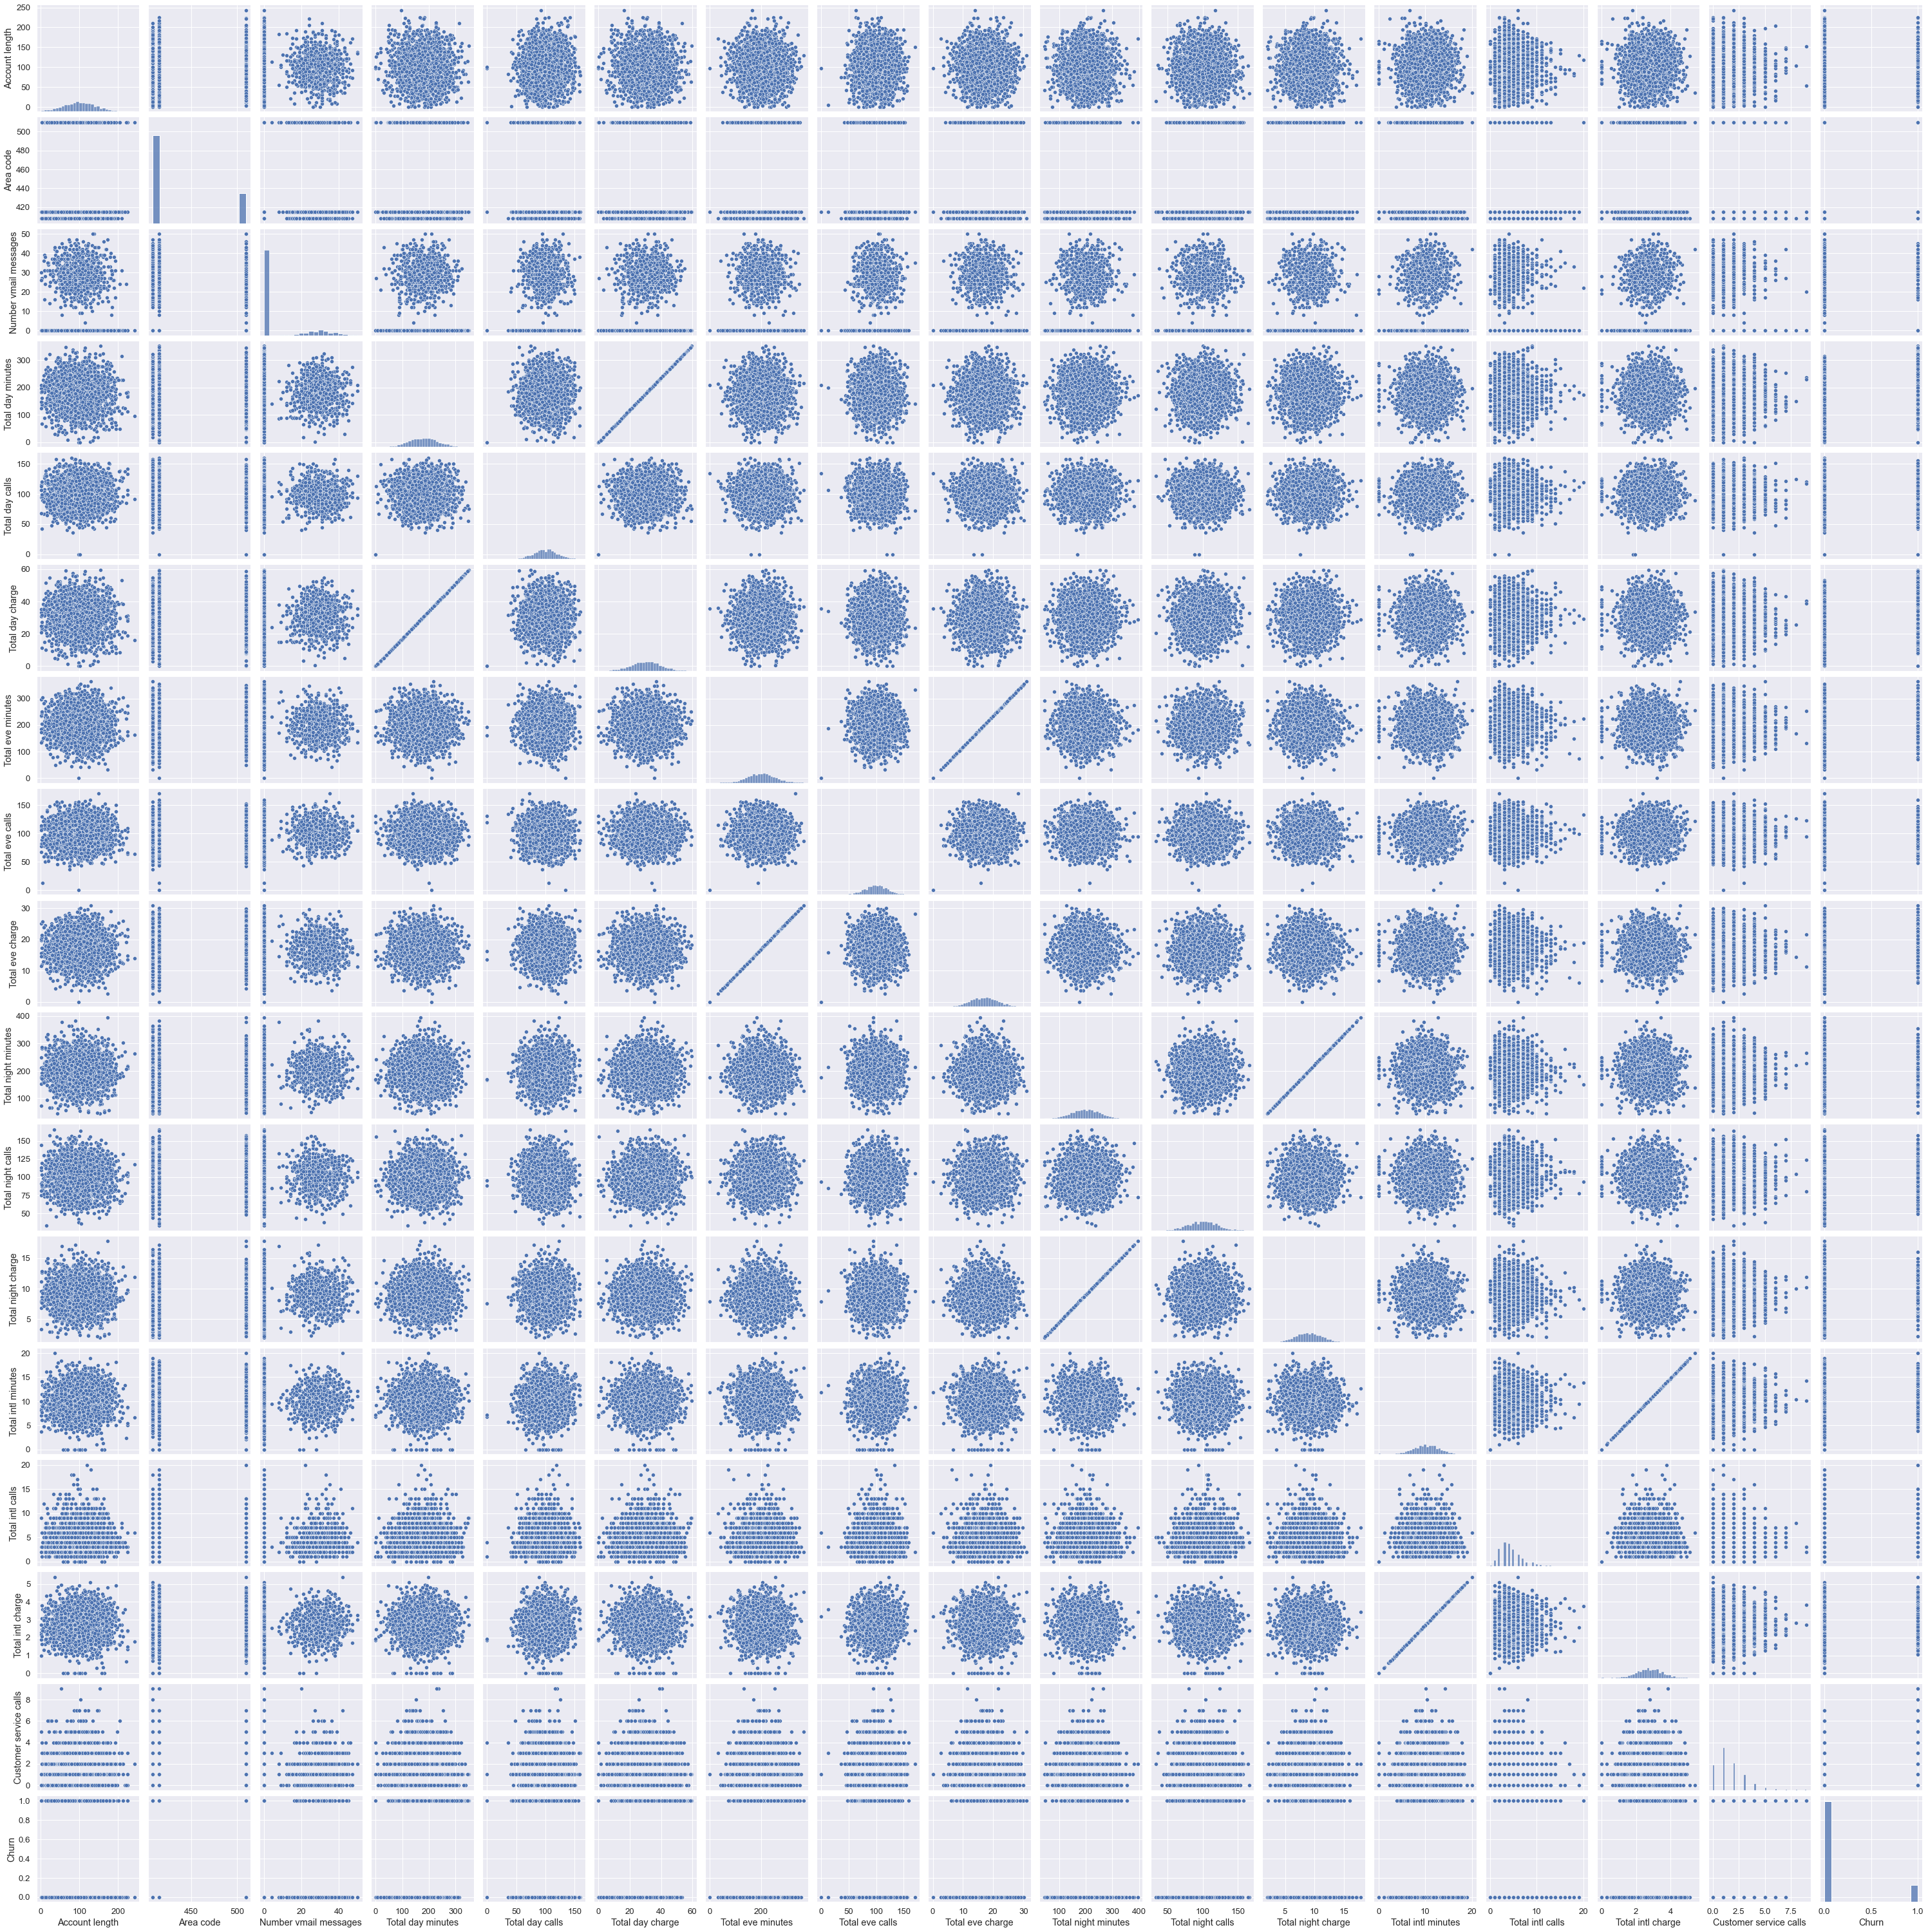

In [28]:
sns.pairplot(df)
plt.show()

<h2 style="color:blue" align="left"> 6. Remove the Outlier from data using Z-Score </h2>

In [29]:
df.shape

(2666, 20)

In [30]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge',]

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(df[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
df = df.drop(df.index[outlier_indices])

In [31]:
df.shape

(2564, 20)

<h2 style="color:blue" align="left"> 7. Check & Reduce Skewness </h2>

- Skewness tells us about the symmetry in a distribution.

* If the **skewness** is **between -0.5 to +0.5** then we can say data is **fairly symmetrical**.
  
* If the **skewness** is **between -1 to -0.5 or 0.5 to 1** then data is **moderately skewed**.
  
* If the **skewness** is **less than -1 and greater than +1** then our data is **heavily skewed**.

In [32]:
df.skew()

Account length            0.033266
Area code                 1.099423
Number vmail messages     1.273903
Total day minutes        -0.018662
Total day calls          -0.023115
Total day charge         -0.018640
Total eve minutes         0.029837
Total eve calls          -0.005496
Total eve charge          0.029882
Total night minutes      -0.019527
Total night calls         0.009399
Total night charge       -0.019603
Total intl minutes        0.002873
Total intl calls          0.795290
Total intl charge         0.003001
Customer service calls    1.101727
Churn                     2.016665
dtype: float64

<h2 style="color:blue" align="left"> 8. Feature Engineering </h2>

droping State columns because it does not have much impact on the output variable

In [33]:
df.drop(['State'], inplace=True, axis=1)

In [34]:
df.head()

Account length  Area code International plan Voice mail plan  \
0             128        415                 No             Yes   
1             107        415                 No             Yes   
2             137        415                 No              No   
3              84        408                Yes              No   
4              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [35]:
df[['International plan','Voice mail plan','Churn']]

International plan Voice mail plan  Churn
0                    No             Yes  False
1                    No             Yes  False
2                    No              No  False
3                   Yes              No  False
4                   Yes              No  False
...                 ...             ...    ...
2661                 No              No  False
2662                 No             Yes  False
2663                 No              No  False
2664                 No              No  False
2665                 No             Yes  False

[2564 rows x 3 columns]

In [36]:
# Using get_dummies method to replace all catergorical values to numerical
a = pd.get_dummies(df[['International plan','Voice mail plan']], drop_first =True) 
df = pd.concat([df,a], axis=1)
#droping the converted features from dataset
df.drop(df[['International plan','Voice mail plan']], axis=1, inplace=True)
df.head()

Account length  Area code  Number vmail messages  Total day minutes  \
0             128        415                     25              265.1   
1             107        415                     26              161.6   
2             137        415                      0              243.4   
3              84        408                      0              299.4   
4              75        415                      0              166.7   

   Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0              110             45.07              197.4               99   
1              123             27.47              195.5              103   
2              114             41.38              121.2              110   
3               71             50.90               61.9               88   
4              113             28.34              148.3              122   

   Total eve charge  Total night minutes  Total night calls  \
0             16.78                244.7                 91   
1             16.62                254.4                103   
2             10.30                162.6                104   
3              5.26                196.9                 89   
4             12.61                186.9                121   

   Total night charge  Total intl minutes  Total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   Total intl charge  Customer service calls  Churn  International plan_Yes  \
0               2.70                       1  False                       0   
1               3.70                       1  False                       0   
2               3.29                       0  False                       0   
3               1.78                       2  False                       1   
4               2.73                       3  False                       1   

   Voice mail plan_Yes  
0                    1  
1                    1  
2                    0  
3                    0  
4                    0

In [37]:
from sklearn.preprocessing import LabelEncoder #Importing the LabelEncoder
le = LabelEncoder() #Creating a object
df['Churn'] = le.fit_transform(df['Churn']) #fitting the label encoder object

In [38]:
df.head()

Account length  Area code  Number vmail messages  Total day minutes  \
0             128        415                     25              265.1   
1             107        415                     26              161.6   
2             137        415                      0              243.4   
3              84        408                      0              299.4   
4              75        415                      0              166.7   

   Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0              110             45.07              197.4               99   
1              123             27.47              195.5              103   
2              114             41.38              121.2              110   
3               71             50.90               61.9               88   
4              113             28.34              148.3              122   

   Total eve charge  Total night minutes  Total night calls  \
0             16.78                244.7                 91   
1             16.62                254.4                103   
2             10.30                162.6                104   
3              5.26                196.9                 89   
4             12.61                186.9                121   

   Total night charge  Total intl minutes  Total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   Total intl charge  Customer service calls  Churn  International plan_Yes  \
0               2.70                       1      0                       0   
1               3.70                       1      0                       0   
2               3.29                       0      0                       0   
3               1.78                       2      0                       1   
4               2.73                       3      0                       1   

   Voice mail plan_Yes  
0                    1  
1                    1  
2                    0  
3                    0  
4                    0

In [39]:
y = df.pop('Churn') #creating y with 'Churn'
X = df #Creating y by removing 'Churn' 

In [40]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2661    0
2662    0
2663    0
2664    0
2665    0
Name: Churn, Length: 2564, dtype: int64

In [41]:
X

Account length  Area code  Number vmail messages  Total day minutes  \
0                128        415                     25              265.1   
1                107        415                     26              161.6   
2                137        415                      0              243.4   
3                 84        408                      0              299.4   
4                 75        415                      0              166.7   
...              ...        ...                    ...                ...   
2661              79        415                      0              134.7   
2662             192        415                     36              156.2   
2663              68        415                      0              231.1   
2664              28        510                      0              180.8   
2665              74        415                     25              234.4   

      Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0                 110             45.07              197.4               99   
1                 123             27.47              195.5              103   
2                 114             41.38              121.2              110   
3                  71             50.90               61.9               88   
4                 113             28.34              148.3              122   
...               ...               ...                ...              ...   
2661               98             22.90              189.7               68   
2662               77             26.55              215.5              126   
2663               57             39.29              153.4               55   
2664              109             30.74              288.8               58   
2665              113             39.85              265.9               82   

      Total eve charge  Total night minutes  Total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
2661             16.12                221.4                128   
2662             18.32                279.1                 83   
2663             13.04                191.3                123   
2664             24.55                191.9                 91   
2665             22.60                241.4                 77   

      Total night charge  Total intl minutes  Total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
2661                9.96                11.8                 5   
2662               12.56                 9.9                 6   
2663                8.61                 9.6                 4   
2664                8.64                14.1                 6   
2665               10.86                13.7                 4   

      Total intl charge  Customer service calls  International plan_Yes  \
0                  2.70                       1                       0   
1                  3.70                       1                       0   
2                  3.29                       0                       0   
3                  1.78                       2                       1   
4                  2.73                       3                       1   
...                 ...                     ...                     ...   
2661               3.

In [42]:
from sklearn.model_selection import train_test_split #importing train_test_split
#spliting into X_train,X_test,y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [43]:
#Training Data
print("X_train", X_train.shape)
print("y_train", y_train.shape)

#Testing Data
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (2051, 18)
y_train (2051,)
X_test (513, 18)
y_test (513,)


In [44]:
#Standaradization of X_train and X_test data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train) #Using fit transform method for X_train data
X_test = sc.transform(X_test) #Using transform method for X_test data

<h2 style="color:blue" align="left"> 9. Building the Model </h2>

In [45]:
from sklearn.linear_model import LogisticRegression #Importing the LogisticRegression model
lgr = LogisticRegression() #creating a object

In [46]:
lgr.fit(X_train,y_train) #fitting X_train and y_train data into lgr object

LogisticRegression()

In [47]:
y_pred = lgr.predict(X_test)

In [48]:
#importing confusion_matrix and accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score 
accuracy_score(y_pred,y_test) 

0.8674463937621832

In [49]:
print(f'Training score : {lgr.score(X_train,y_train)}')
print(f'Testing score  : {lgr.score(X_test,y_test)}')

Training score : 0.8644563627498781
Testing score  : 0.8674463937621832


<h2 style="color:blue" align="left"> 10. Evaluate the results </h2>

In this part, we evaluate the decision tree model. first we make confusion matrix and we visualize the score following ("Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error" and "Roc Area").

In [50]:
#Importing the evaluation metrices for Classification method
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

<b> Confusion Matrix </b>

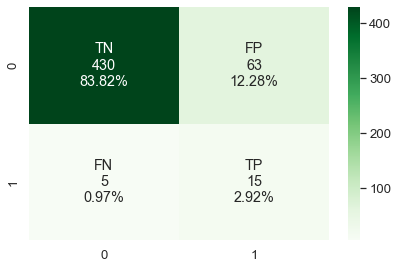

In [51]:
confusion_matrix_Scratch = confusion_matrix(y_pred, y_test)

#[row, column]
TP = confusion_matrix_Scratch[1, 1]        
TN = confusion_matrix_Scratch[0, 0]           
FP = confusion_matrix_Scratch[0, 1]           
FN = confusion_matrix_Scratch[1, 0]

group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_Scratch.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_Scratch.flatten()/np.sum(confusion_matrix_Scratch)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix_Scratch, annot=labels, fmt='', cmap='Greens')

plt.show()

<b> Classificatin Metrics </b>

In [52]:
# Accuracy Score
Accuracy = accuracy_score(y_pred, y_test)
print('Accuracy Score     :', round(Accuracy,2)) 

# Precision Score
Precision = precision_score(y_pred, y_test)
print('Precision Score    :', round(Precision,2))   

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(y_pred, y_test)
print('True positive Rate :', round(TPR,2))             

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate:', round(FPR,2))                       

# F1 Score or F-Measure or F-Score
F1 = f1_score(y_pred, y_test)
print('F1 Score           :', round(F1,2))                 

# Specificity
Specificity = TN / (TN + FP)
print('Specificity        :', round(Specificity,2))                    

# Mean Absolute Error
Error = mean_absolute_error(y_pred, y_test)
print('Mean Absolute Error:', round(Error,2))   

# ROC Area
ROC = roc_auc_score(y_pred, y_test)
print('ROC Area           :', round(ROC,2))

Accuracy Score     : 0.87
Precision Score    : 0.19
True positive Rate : 0.75
False positive Rate: 0.13
F1 Score           : 0.31
Specificity        : 0.87
Mean Absolute Error: 0.13
ROC Area           : 0.81
